In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/car-truck-dataset-combined-images.zip .

In [ ]:
!unzip car-truck-dataset-combined-images.zip

In [ ]:
dataset_dir = '/content/car-truck-dataset-images'

In [ ]:
categories = []

for file in os.listdir(dataset_dir):
    categories.append(file)

In [ ]:
labels_dict = {"Car": 0, "Truck": 1}
labels2type = {0: "Car", 1: "Truck"}

In [ ]:
from keras.preprocessing import image
image_data = []
labels = []

for i in categories:
  path = os.path.join(dataset_dir,i)
  for img_name in os.listdir(path):
      try:
        img = image.load_img(os.path.join(path, img_name), target_size=(128,128))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[i])
      except:
         continue

In [ ]:
print(len(image_data))
print(len(labels))

10168
10168


In [ ]:
print(labels)
print(type(labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
X = np.array(image_data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state = 2)

# Normalisation
X = X/255.0  # we want to keep X each pixal value into the range of 0 to 1

(10168, 128, 128, 3)
(10168,)


In [ ]:
print(Y)

[0 0 0 ... 1 0 1]


In [ ]:
from tensorflow.keras.utils import to_categorical
print(to_categorical(Y))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
# Draw some pokemons
def drawImg(img, label):
    plt.title(labels2type[label])
    plt.imshow(img)
    plt.show()

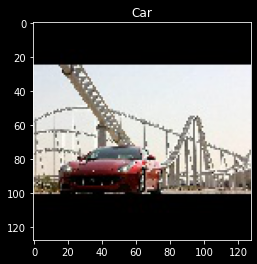

In [ ]:
drawImg(X[0], Y[0])

In [ ]:
split = int(X.shape[0]*0.8)
print(split)
X_ = np.array(X)
Y_ = np.array(Y)

# training set
X = X_[:split,:]
Y = Y_[:split]

#test set
XTest = X_[split:,]
YTest = Y_[split:]

print(X_.shape)
print(X.shape, Y.shape)
print(XTest.shape, YTest.shape)

8134
(10168, 128, 128, 3)
(8134, 128, 128, 3) (8134,)
(2034, 128, 128, 3) (2034,)


In [ ]:
from sklearn.model_selection import train_test_split
# creating a training and validation set
x_train, x_valid, y_train, y_valid=train_test_split(X_,Y_,test_size=0.2, random_state=42)

In [ ]:
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((8134, 128, 128, 3), (8134,)), ((2034, 128, 128, 3), (2034,)))

In [ ]:
def softmax(a):
  e_pa = np.exp(a) 
  ans = e_pa/np.sum(e_pa, axis = 1, keepdims=True) 
  return ans

In [ ]:
class NeuralNetwork:
  def __init__(self, input_size, layers, output_size):

    np.random.seed(0) 

    params = {
        'W1':np.random.randn(input_size, layers[0]),
        'W2':np.random.randn(layers[0], layers[1]),
        'W3':np.random.randn(layers[1], output_size), 
        'B1':np.zeros((1,layers[0])),
        'B2':np.zeros((1,layers[1])),
        'B3':np.zeros((1,output_size)),
    }

    self.params = params
    self.activation_outputs = None


  def forward(self, x):
    params = self.params
    
    W1 = params['W1']
    W2 = params['W2']
    W3 = params['W3']

    B1 = params['B1']
    B2 = params['B2']
    B3 = params['B3']

    z1 = np.dot(x,W1) + B1
    a1 = np.tanh(z1)

    z2 = np.dot(a1, W2) + B2
    a2 = np.tanh(z2)

    z3 = np.dot(a2, W3) + B3
    y_ = softmax(z3)

    self.activation_outputs = (a1,a2,y_)
    return y_

  def backward(self, x, y, learning_rate = 0.001):
    params = self.params

    W1 = params['W1']
    W2 = params['W2']
    W3 = params['W3']

    B1 = params['B1']
    B2 = params['B2']
    B3 = params['B3']

    m = x.shape[0]

    a1,a2,y_ = self.activation_outputs
    
    delta3 = y_ - y
    dW3 = np.dot(a2.T,delta3)
    dB3 = np.sum(delta3, axis = 0)/float(m)

    delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
    dW2 = np.dot(a1.T, delta2)
    dB2 = np.sum(delta2, axis = 0)/float(m)

    delta1 = (1-np.square(a1))*np.dot(delta2, W2.T)
    dW1 = np.dot(X.T, delta1)
    dB1 = np.sum(delta1, axis = 0)/float(m)

    
    params["W1"] -= learning_rate*dW1
    params['B1'] -= learning_rate*dB1

    params["W2"] -= learning_rate*dW2
    params['B2'] -= learning_rate*dB2

    params["W3"] -= learning_rate*dW3
    params['B3'] -= learning_rate*dB3

  def predict(self, x):
    y_out = self.forward(x)
    return np.argmax(y_out, axis = 1)

  def summary(self):
    params = self.params

    W1 = params['W1']
    W2 = params['W2']
    W3 = params['W3']

    a1,a2,y_ = self.activation_outputs

    print("W1 ",W1.shape)
    print("A1 ",a1.shape)

    print("W2 ",W2.shape)
    print("A2 ",a2.shape)

    print("W3 ",W3.shape)
    print("Y_ ",y_.shape)

In [ ]:
def loss(y_oht, p):
  l = -np.mean(y_oht*np.log(p))
  return l

def one_hot(y, depth):
  m = y.shape[0]
  y_oht = np.zeros((m,depth))
  y_oht[np.arange(m), y] = 1
  return y_oht

In [ ]:
def train(X,Y, model, epochs, learning_rate, logs = True):
  training_loss = []

  classes = 2
  Y_OHT = one_hot(Y, classes)

  for ix in range(epochs):

    Y_ = model.forward(X)
    l = loss(Y_OHT, Y_)
    training_loss.append(l)
    model.backward(X, Y_OHT, learning_rate)

    if(logs and ix%50 == 0):
      print("Epochs %d Loss %.4f"%(ix,l))
  
  return training_loss

In [ ]:
model = NeuralNetwork(input_size = 49152, layers = [500, 250], output_size = 2) #49152 image is of 100x100x3 dimension.

In [ ]:
print(X.shape)

(8134, 128, 128, 3)


In [ ]:
X = X.reshape(X.shape[0], -1)  #we are putting all the pixal into single row by reshaping it.
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(8134, 49152)
(2034, 49152)


In [ ]:
l = train(X,Y,model,300,0.0002)

Epochs 0 Loss 3.1942
Epochs 50 Loss 1.6123
Epochs 100 Loss 0.9680
Epochs 150 Loss 0.9613
Epochs 200 Loss 0.3481
Epochs 250 Loss 0.3223


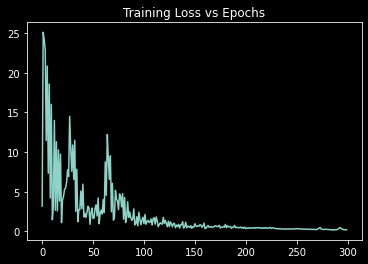

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)
plt.show()

In [ ]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs == Y)/Y.shape[0]
    return acc
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.8267
Test Acc 0.6131


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[4019  707]
 [ 703 2705]]


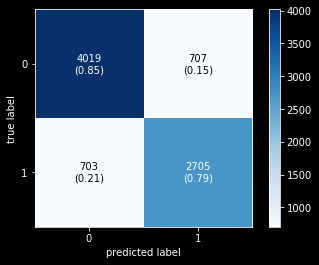

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )

In [ ]:
from sklearn.metrics import classification_report
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1196
           1       0.53      0.55      0.54       838

    accuracy                           0.61      2034
   macro avg       0.60      0.60      0.60      2034
weighted avg       0.62      0.61      0.61      2034



In [ ]:
test_cnf_matrix = confusion_matrix(test_outputs,YTest)
print(test_cnf_matrix)

[[785 411]
 [376 462]]


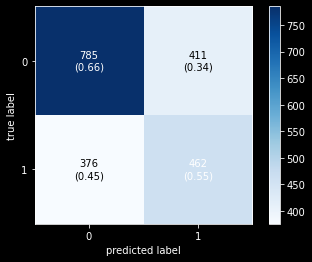

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=test_cnf_matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )